In [6]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Prikaz prvih pet redova dataseta (kako bi vidjeli da se dataset pravilno učitao)

url = 'all_energy_statistics.csv'
dataset = pd.read_csv(url, header=0)
dataset.head()


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [40]:
# Učitavanje podataka za odabranu zemlju [IT, HR, FR, UK, ES]

country = "Croatia"

total_country_data = dataset[dataset.country_or_area == country]

# Filter data for specific category

## Renewable sources
wind = total_country_data[total_country_data.category == 'wind_electricity']
solar = total_country_data[total_country_data.category == 'solar_electricity']
hydro = total_country_data[total_country_data.category == 'hydro']

## Unrenewable sources
nuclear = total_country_data[total_country_data.category == 'nuclear_electricity']
combustible_fuels = total_country_data[total_country_data.commodity_transaction == 'From combustible fuels – Autoproducer']

# Filter data for specific year
year = 2014
quantities = []

wind_year = wind[wind.year == year].quantity
quantities.append(wind_year.item())
solar_year = solar[solar.year == year].quantity
quantities.append(solar_year.item())
hydro_year = hydro[hydro.year == year].quantity
quantities.append(hydro_year.item())

nuclear_year = nuclear[nuclear.year == year].quantity
if (len(nuclear_year.to_list()) == 0):
    quantities.append(0)
else:
    quantities.append(nuclear_year.item())
combustible_fuels_year = combustible_fuels[combustible_fuels.year == year].quantity.iloc[0]
quantities.append(combustible_fuels_year.item())


Text(0.5, 1.0, 'Croatia')

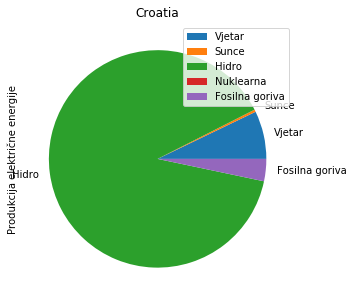

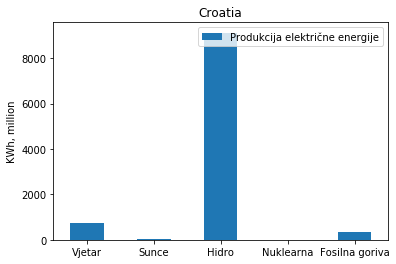

In [41]:
# Crtanje grafa u obliku torte koji prikazuje omjer proizvedene električne energije po izvoru

df = pd.DataFrame({'Produkcija električne energije': quantities},
                  index=['Vjetar', 'Sunce', 'Hidro', 'Nuklearna', 'Fosilna goriva'])

plot = df.plot.pie(y='Produkcija električne energije', figsize=(5, 5))
plot.set_title(country)

# Crtanje grafa koji prikazuje količinu proizvedene električne energije po izvoru

ax = df.plot.bar(rot=0)
ax.set_ylabel("KWh, million")
ax.set_title(country)

In [42]:
ax.figure.savefig('produkcija_elek_energije/croatia_production.pdf')
plot.figure.savefig('produkcija_elek_energije/croatia_production_pie.pdf')